In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Carga dos dados

In [178]:
# Abrir o dataset
df_pontuacao = pd.read_csv('datasets/pontuacao_teste.csv')

In [179]:
# Chegar estrutura do dataset
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [180]:
# visualizar Topo do DF
df_pontuacao.head()

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85


In [181]:
# visualizar Final do DF
df_pontuacao.tail()

,horas_estudo,pontuacao_teste
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


# EDA

In [182]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

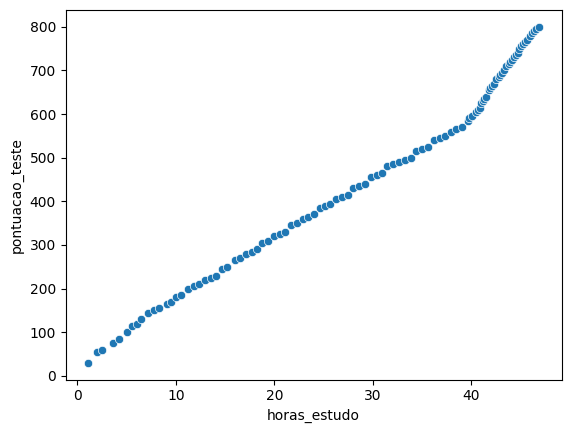

In [183]:
# Plot de dispersão
# X = Horas de estudo
# y = Pontuação
sns.scatterplot(x='horas_estudo', y='pontuacao_teste', data=df_pontuacao)

<Axes: ylabel='horas_estudo'>

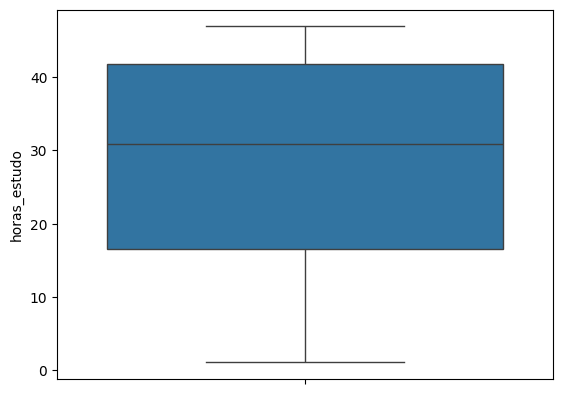

In [184]:
# Verificar se temos outliers
sns.boxplot(data=df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

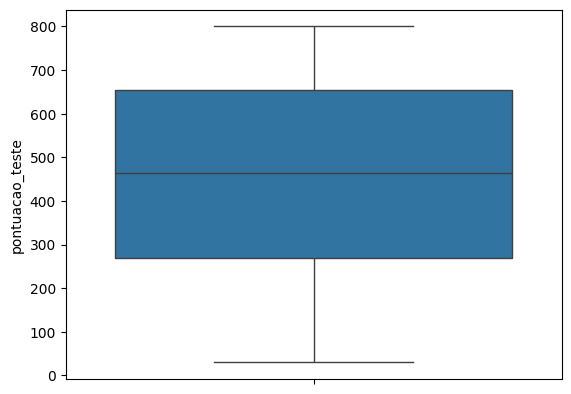

In [185]:
# Verificar se temos outliers
sns.boxplot(data=df_pontuacao, y='pontuacao_teste')

<Axes: >

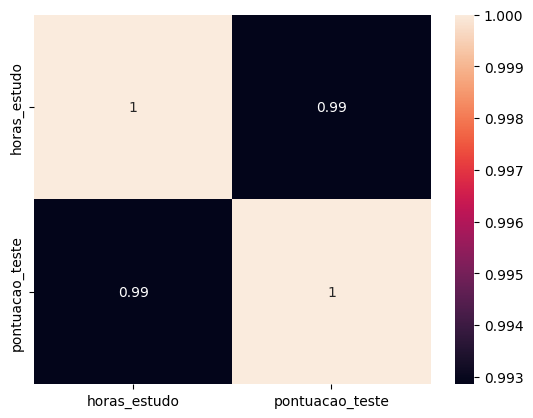

In [186]:
# Verificar Correlação - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

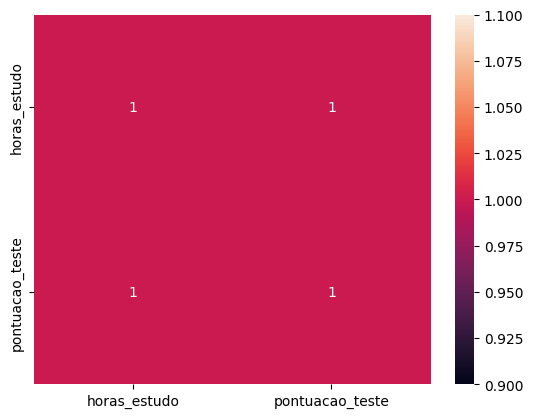

In [187]:
# Verificar Correlação - Pearson
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

<Axes: xlabel='horas_estudo', ylabel='Count'>

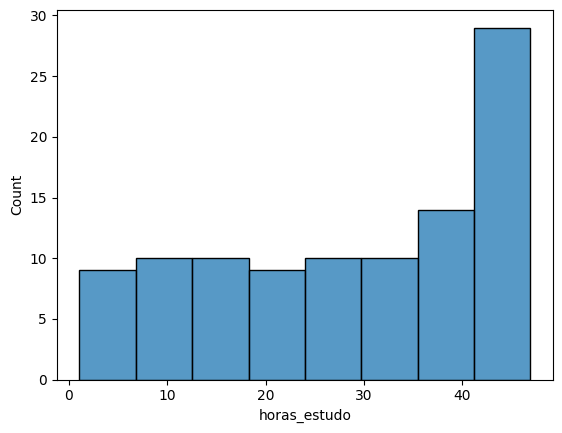

In [188]:
# Histograma das variáveis
# sns.histplot(df_pontuacao['horas_estudo']) ou
sns.histplot(df_pontuacao, x='horas_estudo')


<Axes: xlabel='pontuacao_teste', ylabel='Count'>

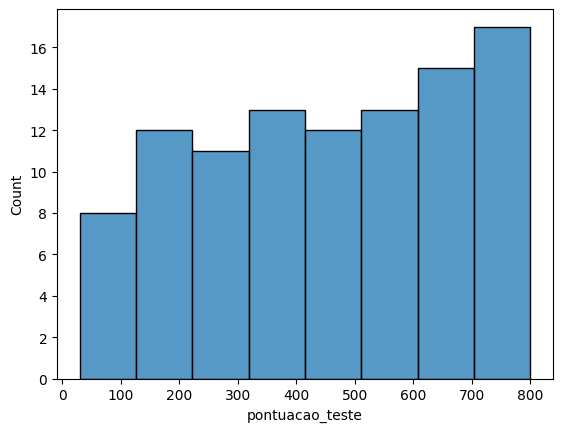

In [189]:
# Histograma das variáveis
# sns.histplot(df_pontuacao['horas_estudo']) ou
sns.histplot(df_pontuacao, x='pontuacao_teste')

# Treinar modelo

In [190]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature, precisamos ajustar o shape do array

X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [191]:
# Instanciar o modelos a ser treindo
reg_model = LinearRegression()

In [192]:
# Treinar o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [193]:
# Imprimir a equação da reta
# y = ax + b
print("A equação da reta é: y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é: y = 15.567387x + 10.017838


### Validar Modelo - Métricas

In [194]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

In [195]:
# Calcular métrica R-squared ou coeficiente de determinação
# R2 representa a proporção da variância para a variável dependente que é explicada pela variável independente
# reg_model.score(X_test, y_test) ou
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
r2_score(y_test, y_pred)

0.986393699300899

In [196]:
# Calcular métrica Mean Absolute Error (MAE)
# MAE = Média (|y - y_pred|)
# É uma métrica fácil de entender, porque é o erro médio
# MAE é menos sensível a outliers
mean_absolute_error(y_test, y_pred)

21.861363575226065

In [197]:
# Caluclar métrica MSE - Mean Squared Error
# MSE = Média((y - y_pred)²)
# Não é fácil de interpretar, porque o erro é quadrático
# É uma métrica que penaliza mais os outliers
mean_squared_error(y_test, y_pred)

634.77640305749

In [198]:
# Calcular métrica RMSE - Root Mean Squared Error
# RMSE = sqrt(MSE)
# É uma métrica que penaliza mais os outliers porém é mais fácil de interpretar
root_mean_squared_error(y_test, y_pred)

25.194769359085033

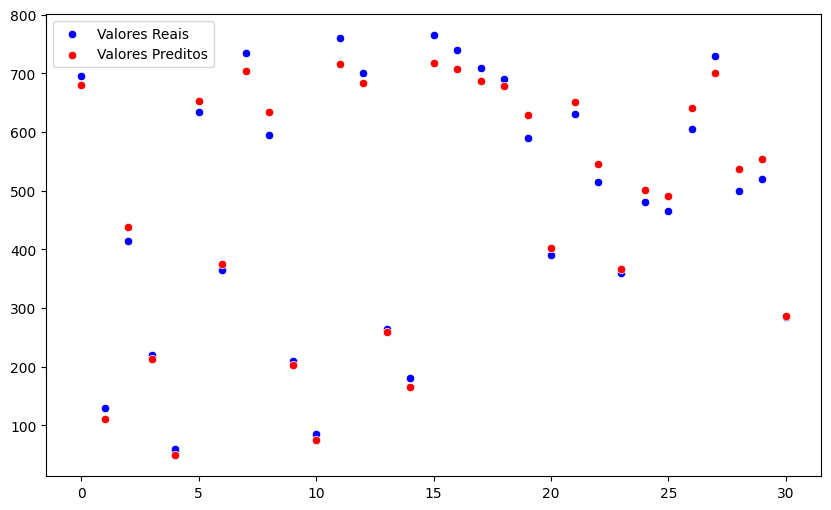

In [199]:
# Análise gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='b', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='r', label='Valores Preditos')
plt.legend()
plt.show()


### Análise de Resíduos

In [200]:
# Calcular residios - Diferença entre o valor real e o valor predito
residuos = y_test - y_pred

In [201]:
residuos

array([[ 14.02779848],
       [ 18.7941492 ],
       [-23.12097007],
       [  7.6061361 ],
       [ 11.06369573],
       [-17.95090558],
       [ -9.29468487],
       [ 30.67671853],
       [-39.27004163],
       [  6.94656808],
       [  9.59913846],
       [ 44.77954789],
       [ 15.91432115],
       [  5.9039762 ],
       [ 14.30829599],
       [ 46.66607056],
       [ 32.5632412 ],
       [ 22.80084383],
       [ 12.1412758 ],
       [-39.59982564],
       [-12.31598081],
       [-21.39416692],
       [-30.53593783],
       [ -6.51099156],
       [-20.39051659],
       [-26.05008461],
       [-35.49699628],
       [ 28.79019586],
       [-37.75224451],
       [-34.8763698 ],
       [ -0.56058107]])

In [202]:
# Calcular os residuos padronizados (standardization)
# Para cada elemento de um conjunto de dados, a pontuação padrão informa quantos desvios padrão ele está longe da média
from scipy.stats import zscore
residuos_padronizados = zscore(residuos)

In [203]:
residuos_padronizados

array([[ 0.5989546 ],
       [ 0.78829915],
       [-0.87679013],
       [ 0.34385235],
       [ 0.48120483],
       [-0.67140794],
       [-0.32753726],
       [ 1.26033738],
       [-1.5183163 ],
       [ 0.31765084],
       [ 0.4230249 ],
       [ 1.82057604],
       [ 0.67389722],
       [ 0.2762336 ],
       [ 0.61009744],
       [ 1.89551865],
       [ 1.33528   ],
       [ 0.94746616],
       [ 0.52401198],
       [-1.53141705],
       [-0.44755905],
       [-0.80819241],
       [-1.1713517 ],
       [-0.21695431],
       [-0.76832214],
       [-0.99314998],
       [-1.36843106],
       [ 1.18539477],
       [-1.4580214 ],
       [-1.34377651],
       [ 0.01942734]])

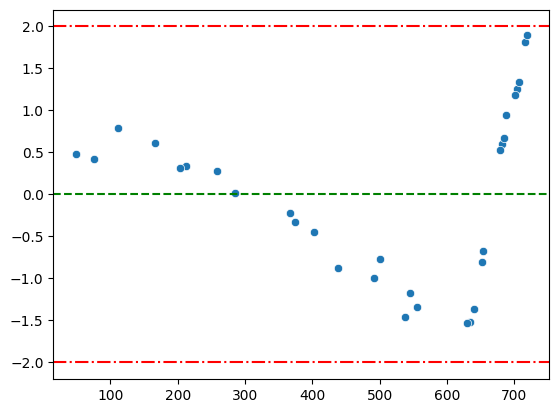

In [204]:
# Verificar linearidade do modelo:
# Se os resíduos estiverem entre -2 e 2 (na escala padrão) o modelo é linear

# Verificar homocedasticidade das variáveis 
# Valores estiver em torno da reta, temos homocedasticidade, caso contrário, heterocedasticidade
# se tiver alguma tendência ou padrão (forma de cone, funil), há heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_padronizados.reshape(-1))
plt.axhline(y=0, color='g', linestyle='--')
plt.axhline(y=2, color='r', linestyle='-.')
plt.axhline(y=-2, color='r', linestyle='-.')

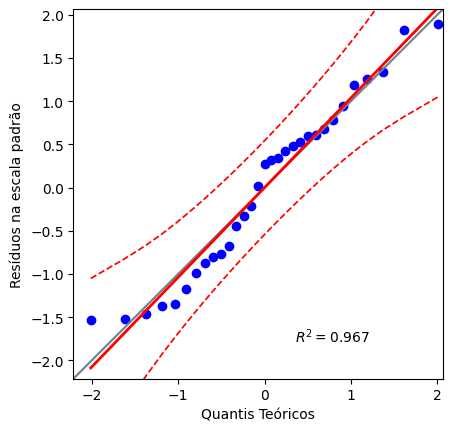

In [205]:
# Checar se os resíduos seguem uma distribuição normal
# QQ (Quantile-Quantile) plot, que avalia se os resíduos seguem uma distribuição normal
# qqplot(residuos_padronizados, line='s')
import pingouin as pg
pg.qqplot(residuos_padronizados, dist='norm', confidence=0.98)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

### Teste de Nonmalidade - Shapiro-Wilk

In [206]:
# Teste de normalidade - Shapiro-Wilk
# H0 - A amostra é proveniente de uma distribuição normal
# H1 - A amostra não é proveniente de uma distribuição normal
# Se o p-valor for menor que 0.05, rejeitamos a hipótese nula
shapiro(residuos_padronizados)

ShapiroResult(statistic=0.9518783487688497, pvalue=0.17586413297959402)

In [207]:
stat_shapiro, p_valor_shapiro = shapiro(residuos_padronizados.reshape(-1))
print("Estatística do teste: {:4f} e p-valor: {:4f}".format(stat_shapiro, p_valor_shapiro))

Estatística do teste: 0.951878 e p-valor: 0.175864


In [208]:
# Teste de normalidade - Kolmogorov-Smirnov
# H0 - A amostra é proveniente de uma distribuição normal
# H1 - A amostra não é proveniente de uma distribuição normal
# Se o p-valor for menor que 0.05, não rejeitamos a hipótese nula
stat_ks, p_valor_ks = kstest(residuos_padronizados.reshape(-1), 'norm')
print("Estatística do teste: {:4f} e p-valor: {:4f}".format(stat_ks, p_valor_ks))

Estatística do teste: 0.124945 e p-valor: 0.672496
